**Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Importing the data file**

In [3]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data.csv


In [4]:
df=pd.read_csv('data.csv')

Data Collection & Processing

In [5]:
# print the first 5 rows of the dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df1=df.drop(['id','Unnamed: 32'],axis=1)

In [8]:
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df1.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
df1.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [11]:
def normalise_row(row):
    if row['diagnosis'] == 'M':
      return 0
    else:
      return 1

In [12]:
# 1 is coded as Benign and 0 as Malignant
df1['label'] = df1.apply(lambda row : normalise_row(row), axis=1)

In [13]:
df2=df1.drop('diagnosis',axis=1)

In [14]:
df2.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [15]:
# number of rows and columns in the dataset
df2.shape

(569, 31)

In [16]:
# getting some information about the data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [17]:
# checking for missing values
df2.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
label                      0
dtype: int64

In [18]:
# statistical measures about the data
df2.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [19]:
# checking the distribution of Target Variables
df2['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [20]:
df2.groupby('label').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Separating the features and target

In [21]:
X = df2.drop(columns='label', axis=1)
Y = df2['label']

In [22]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

Splitting the data into Training data & Testing data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Standardize the data

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

Using Logistic Regression model

In [26]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [27]:
model.fit(X_train_std,Y_train)

LogisticRegression()

In [28]:
acc_train=model.score(X_train_std,Y_train)
acc_test=model.score(X_test_std,Y_test)
print('The accuracy on train data is %s' % (acc_train))
print ('The accuracy on test data is %s' % (acc_test))

The accuracy on train data is 0.989010989010989
The accuracy on test data is 0.9736842105263158


In [29]:
Y_pred=model.predict(X_test_std)

Confusion matrix, without normalization
[[44  1]
 [ 2 67]]
Normalized confusion matrix
[[0.98 0.02]
 [0.03 0.97]]


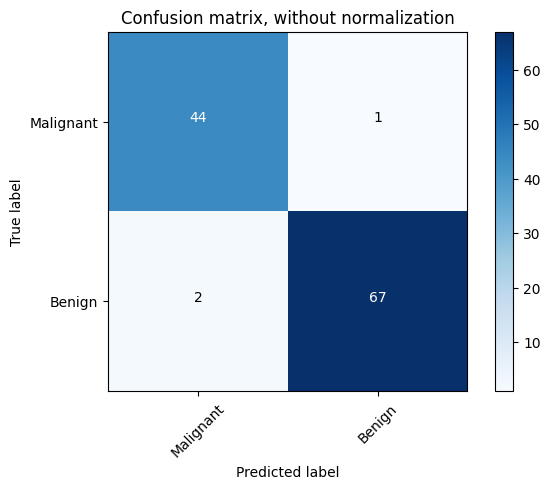

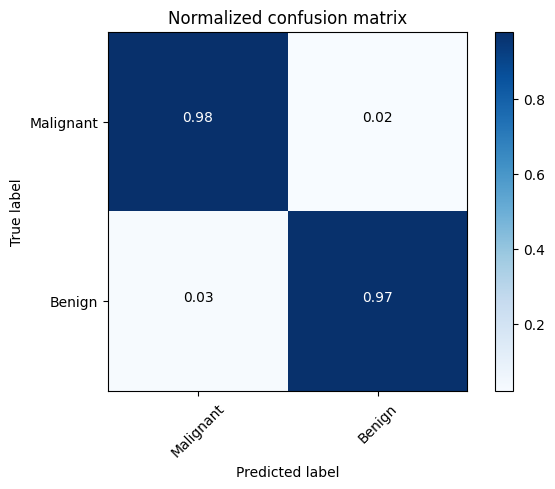

In [30]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Malignant", "Benign"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Malignant", "Benign"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

EXPORT THE TESTED MODEL TO A PICKLE FILE

In [31]:
import pickle
with open('BreastCancerClassification(LR).pickle','wb') as f:
    pickle.dump(model,f)

**USING RANDOM FOREST CLASSIFIER**


In [32]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=18)

In [33]:
model.fit(X_train_std,Y_train)

RandomForestClassifier(n_estimators=18)

In [34]:
acc_train=model.score(X_train_std,Y_train)
acc_test=model.score(X_test_std,Y_test)
print('The accuracy on train data is %s' % (acc_train))
print ('The accuracy on test data is %s' % (acc_test))

The accuracy on train data is 1.0
The accuracy on test data is 0.9298245614035088


In [35]:
Y_pred = model.predict(X_test_std)

Confusion matrix, without normalization
[[42  3]
 [ 5 64]]
Normalized confusion matrix
[[0.93 0.07]
 [0.07 0.93]]


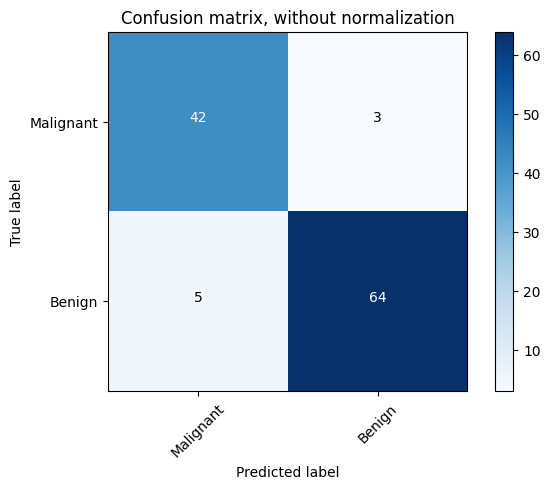

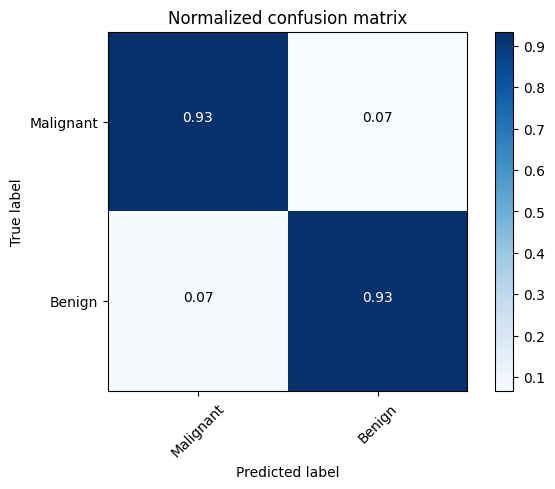

In [36]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Malignant", "Benign"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Malignant", "Benign"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

EXPORT THE TESTED MODEL TO A PICKLE FILE

In [37]:
import pickle
with open('BreastCancerClassification(RF)).pickle','wb') as f:
    pickle.dump(model,f)

**USING SUPPORT VECTOR MACHINE**

In [80]:
from sklearn.svm import SVC
model=SVC()

In [81]:
model.fit(X_train_std,Y_train)

SVC()

In [82]:
acc_train=model.score(X_train_std,Y_train)
acc_test=model.score(X_test_std,Y_test)
print('The accuracy on train data is %s' % (acc_train))
print ('The accuracy on test data is %s' % (acc_test))

The accuracy on train data is 0.9868131868131869
The accuracy on test data is 0.9649122807017544


In [41]:
Y_pred = model.predict(X_test_std)

Confusion matrix, without normalization
[[44  1]
 [ 3 66]]
Normalized confusion matrix
[[0.98 0.02]
 [0.04 0.96]]


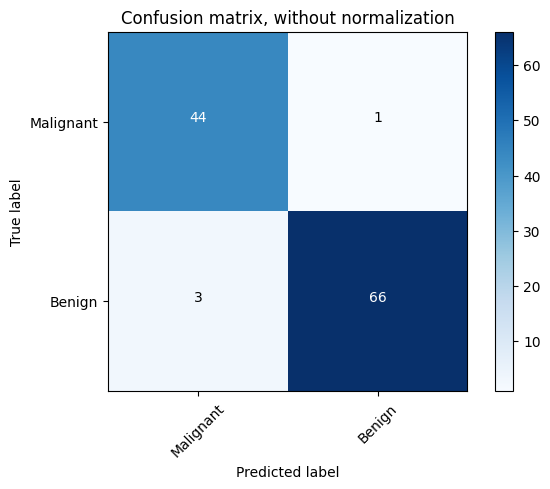

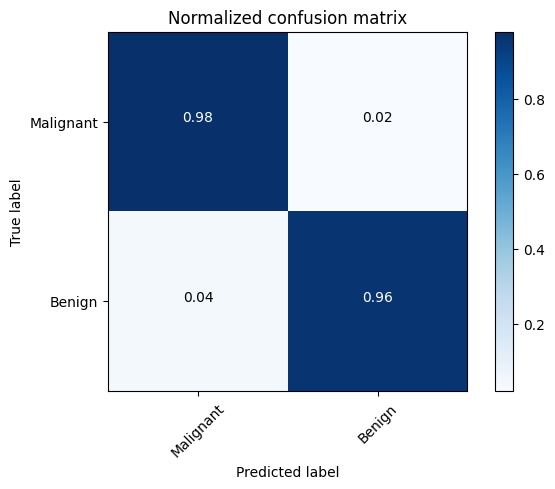

In [42]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Malignant", "Benign"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Malignant", "Benign"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

EXPORT THE TESTED MODEL TO A PICKLE FILE

In [43]:
import pickle
with open('BreastCancerClassification(SVC).pickle','wb') as f:
    pickle.dump(model,f)

**USING XGB REGRESSOR**

In [44]:
from xgboost import XGBClassifier
model=XGBClassifier()

In [45]:
model.fit(X_train_std,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [46]:
acc_train=model.score(X_train_std,Y_train)
acc_test=model.score(X_test_std,Y_test)
print('The accuracy on train data is %s' % (acc_train))
print ('The accuracy on test data is %s' % (acc_test))

The accuracy on train data is 1.0
The accuracy on test data is 0.9473684210526315


In [47]:
Y_pred=model.predict(X_test_std)

Confusion matrix, without normalization
[[44  1]
 [ 5 64]]
Normalized confusion matrix
[[0.98 0.02]
 [0.07 0.93]]


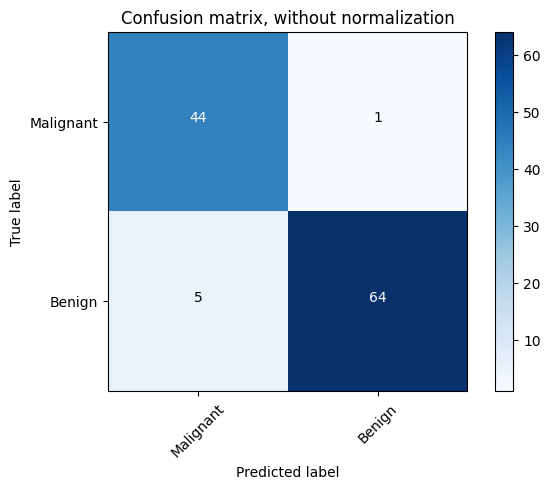

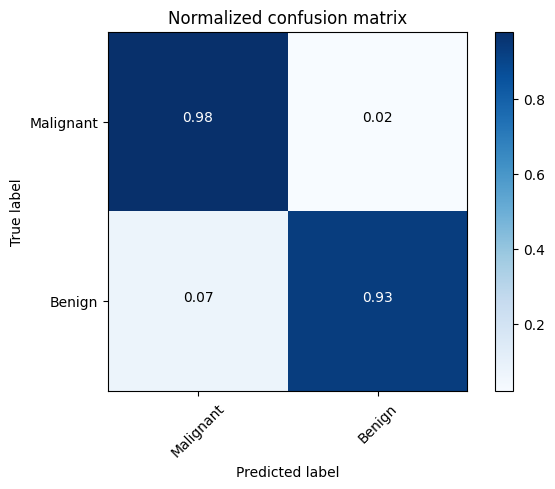

In [48]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Malignant", "Benign"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Malignant", "Benign"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

EXPORT THE TESTED MODEL TO A PICKLE FILE

In [49]:
import pickle
with open('BreastCancerClassification(XGB).pickle','wb') as f:
    pickle.dump(model,f)

**USING KNeighbors Classifier**

In [50]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [51]:
model.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [52]:
acc_train=model.score(X_train_std,Y_train)
acc_test=model.score(X_test_std,Y_test)
print('The accuracy on train data is %s' % (acc_train))
print ('The accuracy on test data is %s' % (acc_test))

The accuracy on train data is 0.9758241758241758
The accuracy on test data is 0.9736842105263158


In [53]:
Y_pred=model.predict(X_test_std)

Confusion matrix, without normalization
[[42  3]
 [ 0 69]]
Normalized confusion matrix
[[0.93 0.07]
 [0.   1.  ]]


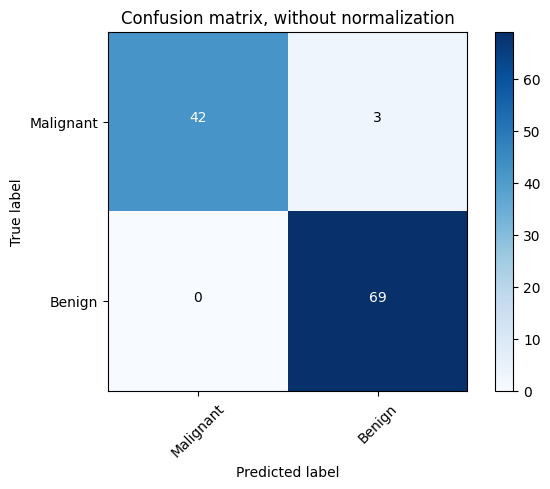

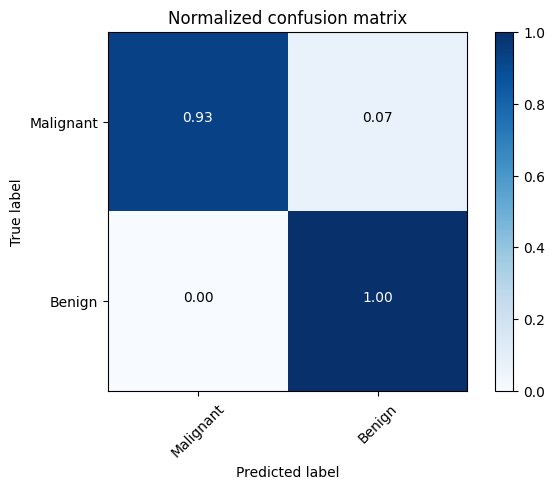

In [54]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Malignant", "Benign"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Malignant", "Benign"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

EXPORT THE TESTED MODEL TO A PICKLE FILE

In [55]:
import pickle
with open('BreastCancerClassification(KNN).pickle','wb') as f:
    pickle.dump(model,f)

**USING GAUSSIAN NB**

In [56]:
from sklearn.naive_bayes import GaussianNB

# Initiating the model:
model= GaussianNB()

In [57]:
model.fit(X_train_std,Y_train)

GaussianNB()

In [58]:
acc_train=model.score(X_train_std,Y_train)
acc_test=model.score(X_test_std,Y_test)
print('The accuracy on train data is %s' % (acc_train))
print ('The accuracy on test data is %s' % (acc_test))

The accuracy on train data is 0.9296703296703297
The accuracy on test data is 0.9385964912280702


In [59]:
Y_pred=model.predict(X_test_std)

Confusion matrix, without normalization
[[42  3]
 [ 4 65]]
Normalized confusion matrix
[[0.93 0.07]
 [0.06 0.94]]


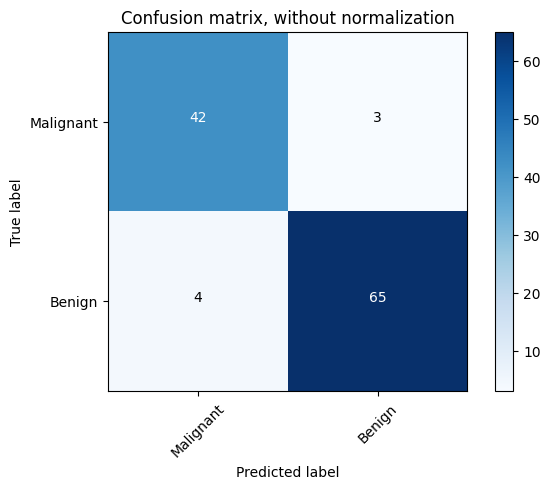

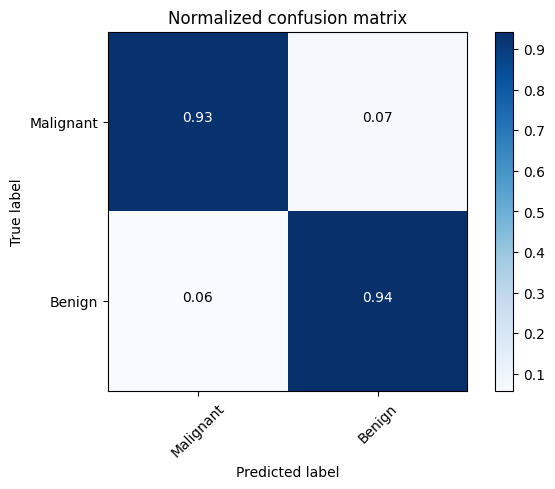

In [60]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Malignant", "Benign"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Malignant", "Benign"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

EXPORT THE TESTED MODEL TO A PICKLE FILE

In [61]:
import pickle
with open('BreastCancerClassification(GNB).pickle','wb') as f:
    pickle.dump(model,f)

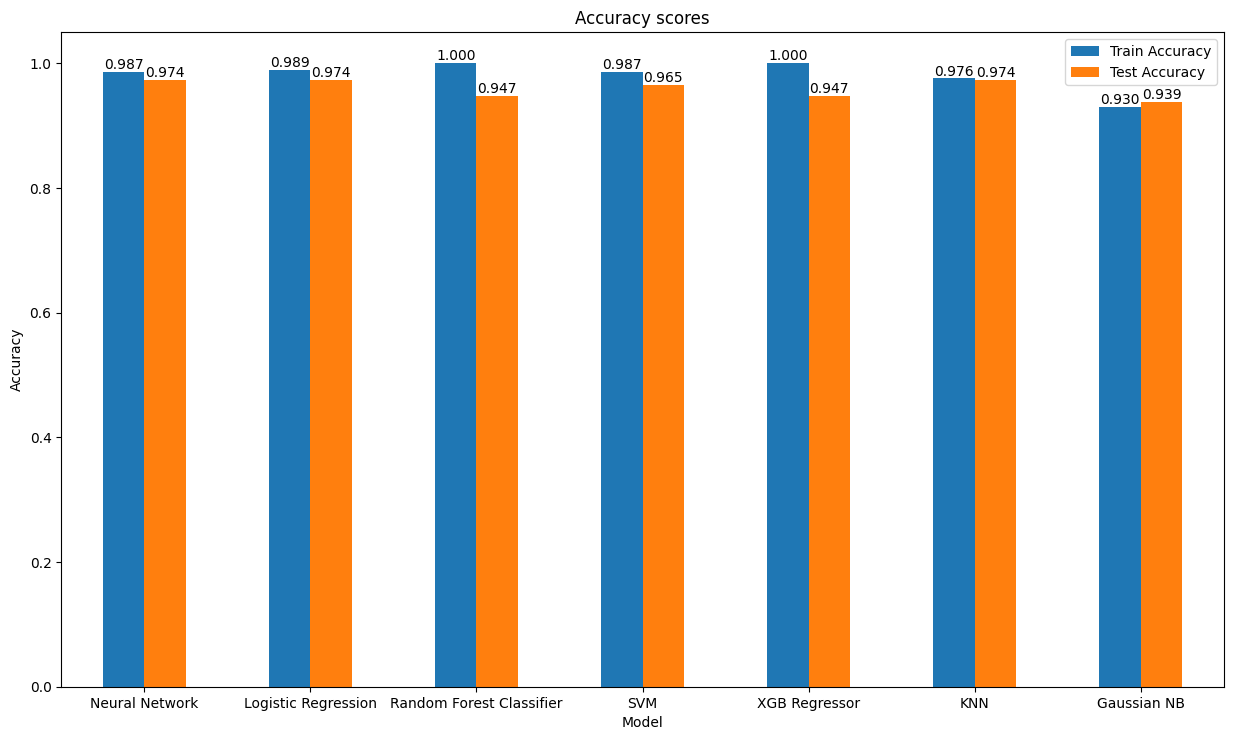

In [83]:
# Import matplotlib and pandas
import matplotlib.pyplot as plt
import pandas as pd

# Create a dataframe with the accuracy scores for each model and class
data = {'Model': ['Neural Network','Logistic Regression','Random Forest Classifier','SVM','XGB Regressor','KNN','Gaussian NB'],
        'Train Accuracy': [0.9868,0.989010989010989,1.0,0.9868131868131869,1.0,0.9758241758241758,0.9296703296703297],
        'Test Accuracy': [0.9737,0.9736842105263158,0.9473684210526315,0.9649122807017544,0.9473684210526315,0.9736842105263158,0.9385964912280702]}

df = pd.DataFrame(data)

# Plot the bar chart with multiple bars for each model
fig, ax = plt.subplots() # Create a figure and an axis object
ax = df.plot(x='Model', kind='bar', figsize=(15,8.5), rot=0, ax=ax) # Use the same axis object for plotting
plt.title('Accuracy scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')
# plt.legend(title='Class')

# Get the bars from the plot
bars = ax.patches

# Write the value on each bar using a loop
for bar in bars:
    # Get the x and y coordinates of the bar
    x = bar.get_x() + bar.get_width() / 2 # The center of the bar
    y = bar.get_height() # The top of the bar

    # Format the value as a string with two decimal places
    value = f'{y:.3f}'

    # Add the text annotation to the plot
    ax.text(x, y, value, ha='center', va='bottom', color='black') # Use 'center' and 'bottom' alignment and black color

plt.show()